# Modèle Black-Scholes et simulation de Monte Carlo


Les options sont des dérivés financiers basés sur la valeur des titres sous-jacents. Ils donnent à l'acheteur le droit d'acheter (options d'achat) ou de vendre (options de vente) l'actif sous-jacent à un prix prédéterminé dans un délai précis. Il existe également deux styles d'options de base : américain et européen. Les options américaines peuvent être exercées à tout moment avant la date d'expiration de l'option, tandis que les options européennes ne peuvent être exercées qu'à la date d'expiration. Ce Notebook plonge dans un modèle d'évaluation des options pour comprendre l'évaluation des options européennes.

## Modèle Black-Scholes

### Solution analytique

Le modèle Black-Scholes est un modèle mathématique de valorisation d'un contrat d'options. Le modèle est basé sur le mouvement brownien géométrique (GBM) avec une tendance et une volatilité constantes. L'équation de Black-Scholes est une équation aux dérivées partielles du second ordre, qui donne une estimation théorique du prix des options européennes dans le temps.


L'équation de Black-Scholes est une équation différentielle partielle parabolique, qui décrit le prix de l'option au fil du temps. L'équation est :
$${\frac {\partial V}{\partial t}}+{\frac {1}{2}}\sigma ^{2}S^{2}{\frac {\partial ^{2}V}{\partial S^{2}}}+rS{\frac {\partial V}{\partial S}}-rV=0$$
où $S(t)$ est le prix de l'actif sous-jacent à l'instant $t$ ; $V(S,t)$ est le prix de l'option en fonction du sous-jacent $S$, à l'instant $t$ ; r est le taux d'intérêt sans risque ; $\sigma$ est la volatilité des rendements de l'actif sous-jacent ; $t$ est l'heure actuelle en années.

en résolvant l'équation des conditions terminales et aux limites correspondantes :

${\begin{aligned}&C(0,t)=0 {\forall}t
\\&C(S,t)\rightarrow S-K{\text{ quand }}S\rightarrow \infty 
\\&C(S,T)=\max\{S-K,0\}\end{aligned}}$

La valeur d'une **option d'achat** (Call) pour une action sous-jacente sans dividendes en termes de paramètres Black-Scholes est :

$$
{   
    \displaystyle{
        \begin{aligned}
            C(S_{t},t)  &=  F_{X}(d_{1})S_{t}-F_{X}(d_{2})Ke^{-r(T-t)}
            \\{\text{avec}}
            \\d_{1}     &=  {\frac{1}{\sigma {\sqrt {T-t}}}}\left[\ln \left({\frac{S_{t}}{K}}\right)+\left(r+{\frac{\sigma^{2}}{2}}\right)(T-t)\right]
            \\d_{2}     &=  d_{1}-\sigma {\sqrt {T-t}}
        \end{aligned}
        }
}
$$
Le prix d'une **option de vente** correspondante avec un facteur de remise $e^{{-r(T-t)}}$ est :
$$
{
    \displaystyle {
        \begin{aligned}
            P(S_{t},t)  &=  Ke^{-r(T-t)}-S_{t}+C(S_{t},t)
            \\          &=  F_{X}(-d_{2})Ke^{-r(T-t)}-F_{X}(-d_{1})S_{t}
        \end{aligned}}
        
}
$$
où $K$ est le prix d'exercice (Strike), $F_{X}$ est la fonction de répartition de $X \sim N(0,1)$, $T$ est l'échéance et $T-t$ est le temps jusqu'à l'échéance en années.

Donc Quand $t=0$ on a:
$${
\displaystyle{
        \begin{aligned}
                C(S_{0},0)  &=  F_{X}(d_{1})S_{0}-F_{X}(d_{2})Ke^{-rT}
                \\P(S_{0},0)  &=  F_{X}(-d_{2})Ke^{-rT}-F_{X}(-d_{1})S_{0}
                
            \\{\text{avec}}
            \\d_{1}     &=  {\frac{1}{\sigma {\sqrt {T}}}}[\ln ({\frac{S_{0}}{K}})+(r+{\frac{\sigma^{2}}{2}})T]
            \\d_{2}     &=  d_{1}-\sigma {\sqrt {T}}
        \end{aligned}
        }}
$$

### Modélisation du titre sous-jacent

Le modèle de Black-Scholes-Samuelson fournit une équation différentielle stochastique qui modélise les variations du cours d'une action donnée au fil du temps.

#### Hypothèses du modèle


Ces hypothèses sont irréalistes mais nécessaires pour le modèle.

- Il existe un taux constant $r$, continuellement composé et sans risque.
- Il n'y a pas de risque de défaut, pas de frais de transaction, pas de spreads, pas d'impôts et pas de dividendes
- Les marchés sont parfaitement liquides avec des ventes à découvert illimitées autorisées
- Aucun arbitrage n'est possible
- 
Le sous-jacent $S$ suit donc un mouvement brownien géométrique, qui satisfait l'équation différentielle stochastique:
$$
\displaystyle{
        \begin{aligned}
            dS_t&=r S_tdt+σS_tdB_t
        \end{aligned}
        }
$$

où $r$ représente rendement instantané (tendance) de sous-jacent $S$, et $B$ est un mouvement Brownien.La solution analytique de l'EDS peut être résolue comme suit (lemme d'Ito) :
$$
\displaystyle{
        \begin{aligned}
            S_T &=  S_{0}e^{(r - \sigma^2/2)T+\sigma \sqrt{T} Z}
        \end{aligned}
        }
$$
où $Z$ est une variable aléatoire normale centrée réduite.

Or d'aprés le cours on a si $U_1$ et $U_2$ de variable aléatoire independant qui suite la loi $U_{[0,1]}$ Donc 
$$Z=\sqrt{-2 \cdot \log(U_1)}\cdot\sin(2\cdot\pi\cdot U_2)\sim N(0,1)$$

#### Simulation de l'actif sous-jacent $S$ Vectorisé

In [1]:
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy.random import  uniform,seed
from numpy import log,sin,pi,sqrt,exp,maximum,array
seed(1)

Une façon courante de simuler une variable aléatoire consiste à utiliser des vecteurs de tail `N` (N échantillon):

In [2]:
def Normal(sample_sizes,N=1):
    """
    Returns a standard normal random variable.
    """    
    U1=uniform(0,1,size=(sample_sizes,N))
    U2=uniform(0,1,size=(sample_sizes,N))
    return sqrt(-2*log(U1))*sin(2*pi*U2)
Z=Normal(100000)

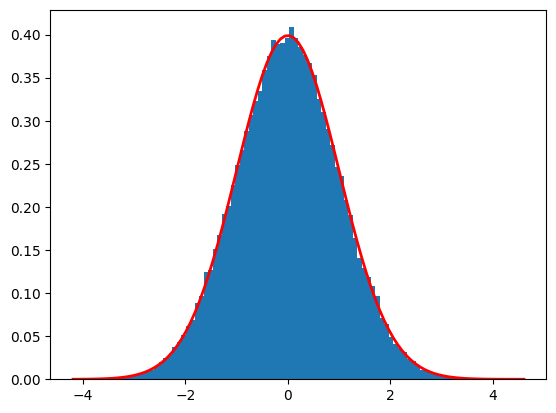

In [3]:
count, bins, ignored = plt.hist(Z, 100, density=True)
plt.plot(bins, 1/(sqrt(2 * pi))*exp( - (bins)**2 / 2 ),linewidth=2, color='r')
plt.show()

Nous pouvons voir une distribution de forme normale habituel.

In [4]:
def Stock_Price(S_0,r,sigma,t):
    return  S_0*exp((r - sigma**2/2)*t+sigma*sqrt(t)* Z)

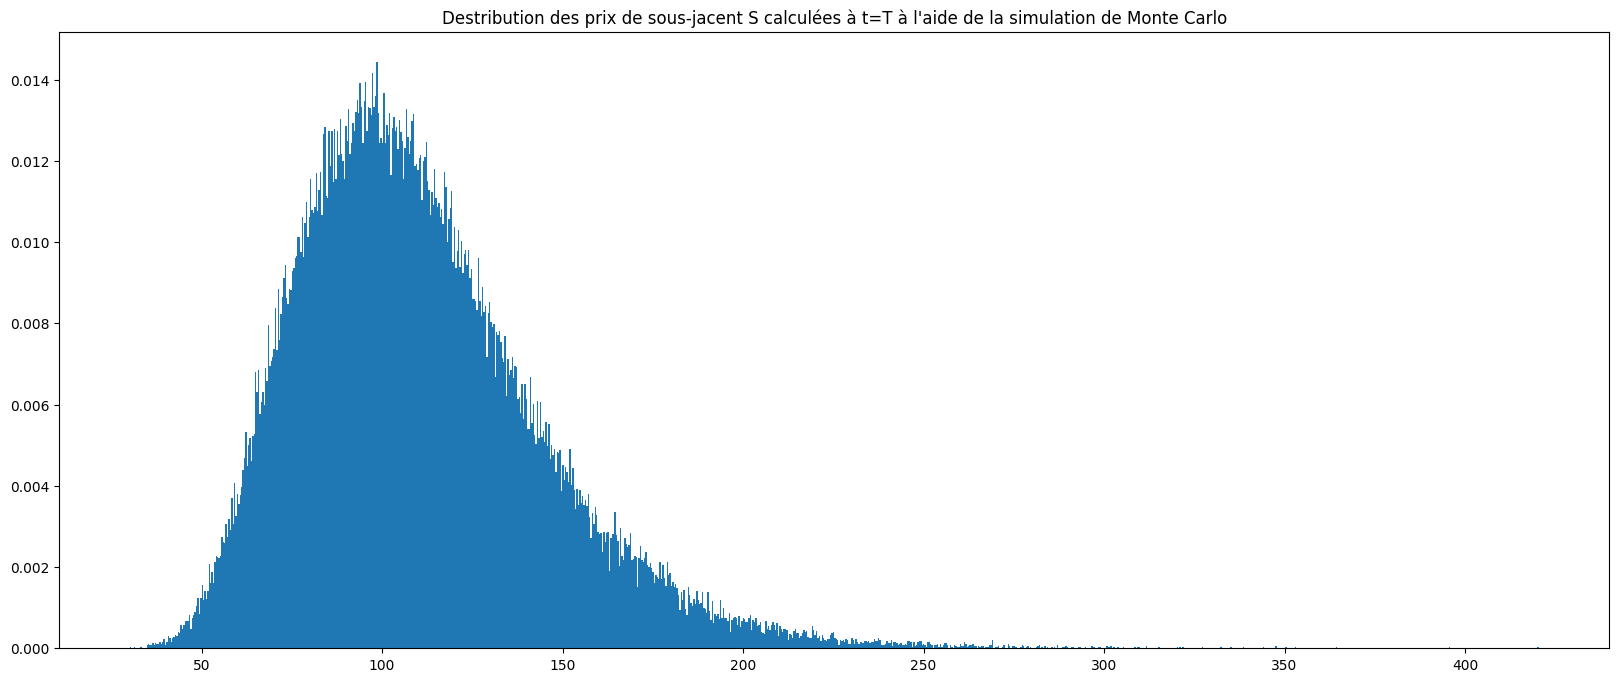

In [5]:
S_0=100
r=0.1
sigma=0.3
T=1         # Maturité de 1 an
S_T=Stock_Price(S_0,r,sigma,T)
plt.figure(figsize=(20,8))
plt.title("Destribution des prix de sous-jacent S calculées à t=T à l'aide de la simulation de Monte Carlo")
plt.hist(S_T, 1000, density=True)
plt.show()

## Simulation des option

### Call/Put option simulation

Nous fixerons le prix d'une option d'achat européenne vanille dans cette section. A ce titre nous avons besoin des informations suivantes :
- Taux d'intérêt sans risque composé en continu, $r$
- Volatilité des actions, $\sigma$
- Cours initial de l'action, $S_0$
- Prix d'exercice de l'option, $K$
- Échéance de l'option, $T$

#### Le Payoff de l'option d'achat

Le Payoff de l'option d'achat est donné par :
$$ \displaystyle{
        \begin{aligned}
            (S_T - K)^+ &=\max(S_T - K,0)
        \end{aligned}
        }
$$

c-à-d nous exerçons le droit d'acheter l'action à un prix égal au prix d'exercice, $K$, lorsque la valeur de l'action, $S$ est supérieure au prix d'exercice, sinon nous n'exerçons pas l'option.

Pour l'option européenne, l'acheteur choisit d'exercer l'option à la date d'échéance $T$, le vendeur est obligé de vendre l'action sous-jacente à l'acheteur au prix d'exercice $K$. Ainsi, le prix de l'option d'achat au temps $t = 0$ est:
$$
\displaystyle{
        \begin{aligned}
            C_0 &= E[e^{-rT}(S_T - K)^+]
        \end{aligned}
        }
$$

Supposons que:

- Le taux sans risque est de 10%
- La volatilité des actions est de 30 %
- Le prix actuel de l'action est de $100
- Le prix d'exercice sur l'option d'achat européenne est de $110
- La durée du contrat est de 12 mois

In [154]:
r=0.1
sigma=0.3
S_0=100
K=110
T=1         # Maturité
sample_sizes=50
N=1000
Z=Z=Normal(sample_sizes,N)
S_T=Stock_Price(S_0,r,sigma,T)

In [155]:
C_0=exp(-r*T)*maximum(S_T-K,0)
MC_0=C_0.mean(axis=1)
STD_0=C_0.std(axis=1)/sqrt(array([i for i in range(1,51)])*N)
MC_call_price=MC_0.mean()
print(f" le prix de l'option d'achat au temps t = 0 par Methode de monte carlo est: ${MC_call_price:.5}")


 le prix de l'option d'achat au temps t = 0 par Methode de monte carlo est: $12.075


In [157]:
d_1 = (log(S_0/K) + (r + sigma**2/2)*T)/(sigma*sqrt(T))
d_2 = d_1 - sigma*sqrt(T)
analytic_callprice = S_0*norm.cdf(d_1) - K*exp(-r*T)*norm.cdf(d_2)
print(f" le prix de l'option d'achat au temps t = 0 par Methode analytique est: ${analytic_callprice:.5}")

 le prix de l'option d'achat au temps t = 0 par Methode analytique est: $12.131


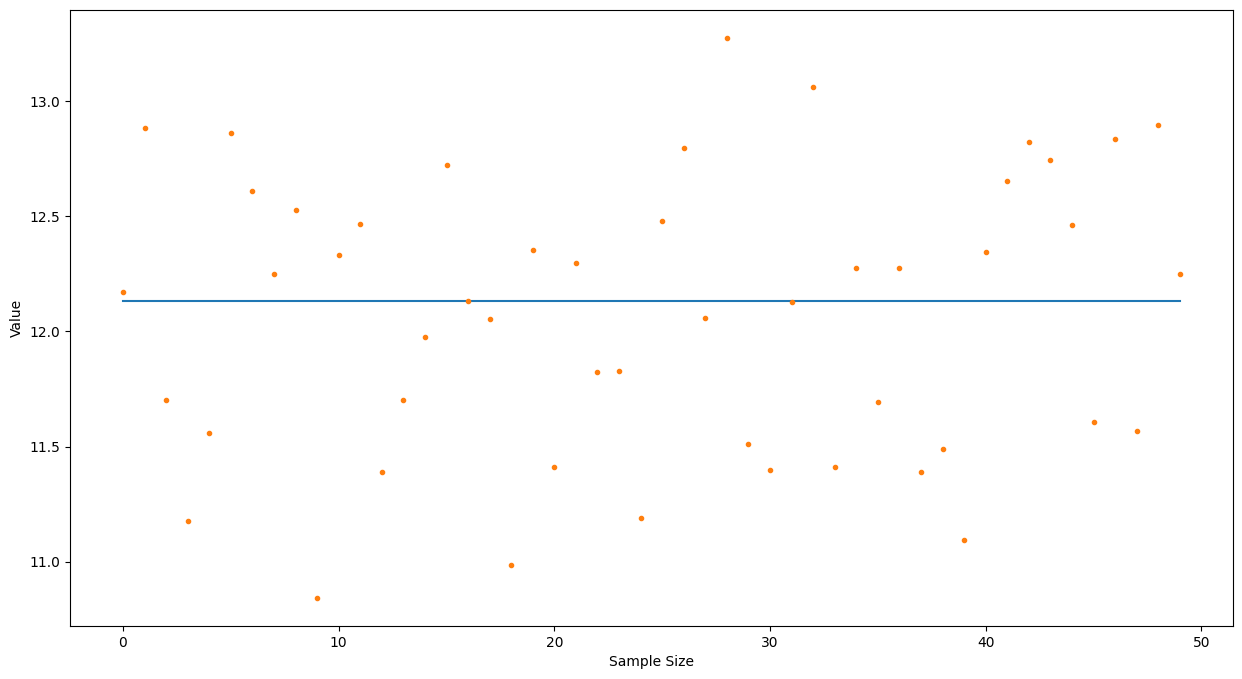

In [159]:
plt.figure(figsize=(15,8))
plt.plot([analytic_callprice]*sample_sizes)
plt.plot(MC_0, ".")
plt.xlabel("Sample Size")
plt.ylabel("Value")
plt.show()